In [75]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt

## 1) Import hdf5 file 

In [76]:
# Assign filename: file
file = 'Datasets/gss.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the keys of the file
# Print the names of the groups in the HDF5 file
for key in data.keys():
    print(key)

# Get the HDF5 group: group
group = data['gss']

# Check out keys of group
for key in group.keys():
    print(key)             
    
# Set variable equal to time series data: strain
axis1 = np.append(data['gss']['block0_items'], data['gss']['block1_items'])
print(axis1.shape)

axis01 = data['gss']['block0_values']
axis02 = data['gss']['block1_values']
axis0 = np.concatenate((axis01, axis02), axis=1)
print(axis0.shape)

gss
axis0
axis1
block0_items
block0_values
block1_items
block1_values
(10,)
(62466, 10)


In [77]:
gss = pd.DataFrame(axis0, columns=axis1)
gss.head(2)

,b'age',b'cohort',b'educ',b'realinc',b'gunlaw',b'grass',b'wtssall',b'year',b'sex',b'race'
0,26.0,1946.0,18.0,13537.0,2.0,NaN,0.8893,1972.0,1.0,1.0
1,38.0,1934.0,12.0,18951.0,1.0,NaN,0.4446,1972.0,2.0,1.0


In [78]:
col = []
for i, val in enumerate(gss.columns):
    col.append(val.decode('utf8'))
gss.columns = col

In [79]:
gss.head(2)

,age,cohort,educ,realinc,gunlaw,grass,wtssall,year,sex,race
0,26.0,1946.0,18.0,13537.0,2.0,NaN,0.8893,1972.0,1.0,1.0
1,38.0,1934.0,12.0,18951.0,1.0,NaN,0.4446,1972.0,2.0,1.0


## 2) PMF function - Probability Mass Function

In [111]:
def pmf(series):
    total = np.sum(gss.age.value_counts())
    pmf_value = gss.age.value_counts() / total
    return pmf_value

pmf_age = pmf(gss.age)

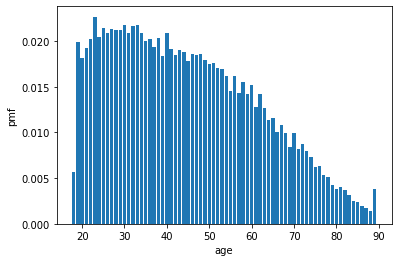

In [115]:
plt.bar(pmf_age.index, pmf_age)
plt.xlabel('age')
plt.ylabel('pmf')
plt.show()

## 3) ECDF (Evauated Cumulative Distribution Function)

In [118]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

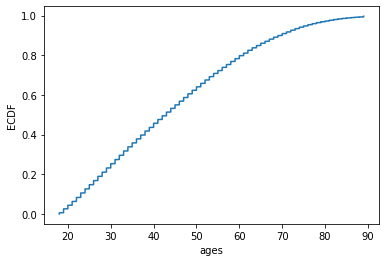

In [127]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(gss.age)

# Generate plot
plt.plot(x_vers, y_vers)

# Label the axes
plt.xlabel('ages')
plt.ylabel('ECDF')

# Display the plot
plt.show()